<a href="https://colab.research.google.com/github/littlerobinson/luciole_machine_learning/blob/main/notebooks/LSTM_GRU_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction aux Réseaux de Neurones Récurrents Simples (Simple RNN)

Les Réseaux de Neurones Récurrents (RNN) sont une classe de réseaux de neurones particulièrement adaptés au traitement des données séquentielles, telles que les séries temporelles ou les séquences de texte. Contrairement aux réseaux de neurones classiques, les RNN possèdent des connexions récurrentes qui leur permettent de conserver une mémoire des informations passées.

## Architecture d'un RNN Simple

Un RNN simple se compose de neurones récurrents qui prennent en entrée non seulement le vecteur d'entrée actuel, mais aussi leur propre sortie à l'instant précédent. Cela permet au réseau de conserver une trace de l'état précédent et de le combiner avec l'entrée actuelle pour produire une nouvelle sortie.

![Architecture d'un RNN simple](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1280px-Recurrent_neural_network_unfold.svg.png)
*Source: [Wikipedia](https://en.wikipedia.org/wiki/Recurrent_neural_network)*

## Fonctionnement d'un RNN Simple

1. **Initialisation** : Au temps t=0, l'état caché est initialisé (souvent à zéro).
2. **Propagation** : À chaque instant t, l'état caché \( h_t \) est mis à jour en fonction de l'entrée actuelle \( x_t \) et de l'état caché précédent \( h_{t-1} \).

L'équation de mise à jour est généralement la suivante :
\[ h_t = \text{tanh}(W_{hh} h_{t-1} + W_{xh} x_t + b_h) \]
où \( W_{hh} \) et \( W_{xh} \) sont des matrices de poids, et \( b_h \) est un biais.

3. **Sortie** : La sortie du RNN à l'instant t peut être calculée à partir de l'état caché actuel \( h_t \).

## Applications des RNN Simples

Les RNN simples peuvent être utilisés pour diverses tâches de séquences, telles que :
- La classification de séquences (par exemple, analyse de sentiments)
- La génération de texte
- La prédiction de séries temporelles

## Avantages et Limitations

### Avantages
- **Mémoire à court terme** : Les RNN simples peuvent retenir les informations de quelques instants précédents, ce qui est utile pour les données séquentielles.

### Limitations
- **Vanishing Gradient** : Lors de l'entraînement des RNN, les gradients peuvent devenir très petits (ou très grands), ce qui rend difficile l'apprentissage des dépendances à long terme.
- **Mémoire limitée** : Les RNN simples ne sont pas bien adaptés pour capturer des dépendances à long terme dans les séquences. Des variantes comme les LSTM (Long Short-Term Memory) et les GRU (Gated Recurrent Unit) ont été développées pour surmonter ces limitations.


In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # nombre de mots à considérer comme caractéristiques
maxlen = 500  # couper les textes après ce nombre de mots (parmi les max_features mots les plus courants)
batch_size = 32

print('Chargement des données...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'séquences d\'entraînement')
print(len(input_test), 'séquences de test')


2024-09-26 12:07:33.384097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 12:07:33.393682: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 12:07:33.396629: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 12:07:33.404365: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Chargement des données...
25000 séquences d'entraînement
25000 séquences de test


In [3]:

print('Remplissage des séquences (échantillons x temps)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('Shape de input_train :', input_train.shape)
print('Shape de input_test :', input_test.shape)


Remplissage des séquences (échantillons x temps)
Shape de input_train : (25000, 500)
Shape de input_test : (25000, 500)


In [ ]:
# Importer les packages nécessaires
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 357ms/step - loss: 0.6546 - acc: 0.6143 - val_loss: 0.5657 - val_acc: 0.7102
Epoch 2/10
157/157 [==============================] - 54s 346ms/step - loss: 0.4284 - acc: 0.8191 - val_loss: 0.4783 - val_acc: 0.7736
Epoch 3/10
157/157 [==============================] - 52s 331ms/step - loss: 0.3202 - acc: 0.8709 - val_loss: 0.4673 - val_acc: 0.8042
Epoch 4/10
157/157 [==============================] - 51s 324ms/step - loss: 0.2490 - acc: 0.9028 - val_loss: 0.4727 - val_acc: 0.7846
Epoch 5/10
157/157 [==============================] - 50s 321ms/step - loss: 0.1837 - acc: 0.9319 - val_loss: 0.4737 - val_acc: 0.7932
Epoch 6/10
157/157 [==============================] - 51s 322ms/step - loss: 0.1257 - acc: 0.9562 - val_loss: 0.4412 - val_acc: 0.8428
Epoch 7/10
157/157 [==============================] - 50s 316ms/step - loss: 0.0852 - acc: 0.9729 - val_loss: 0.5858 - val_acc: 0.7752
Epoch 8/10
157/157 [==============================] - 4

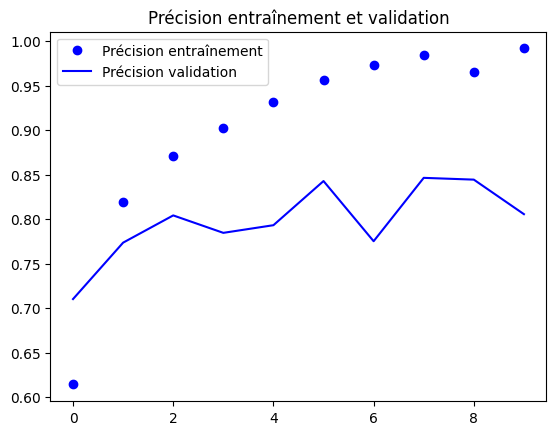

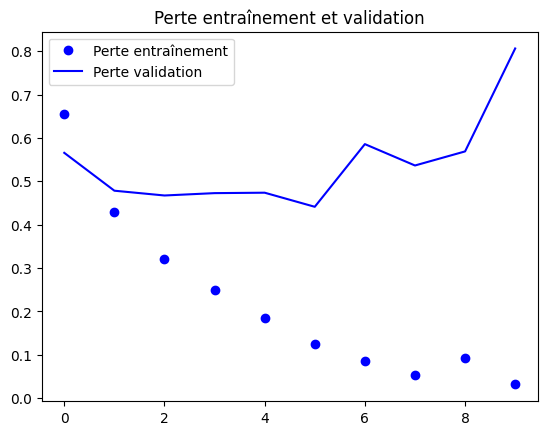

In [ ]:
import matplotlib.pyplot as plt

# Données d'historique d'entraînement et de validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Nombre d'époques d'entraînement
epochs = range(len(acc))

# Graphique de la précision d'entraînement et de validation
plt.plot(epochs, acc, 'bo', label='Précision entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision validation')
plt.title('Précision entraînement et validation')
plt.legend()

# Affichage du graphique
plt.figure()

# Graphique de la perte d'entraînement et de validation
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title('Perte entraînement et validation')
plt.legend()

# Affichage du graphique
plt.show()


# LSTM

# Introduction aux Long Short-Term Memory (LSTM)

Les LSTM (Long Short-Term Memory) sont une variante des Réseaux de Neurones Récurrents (RNN) conçue pour mieux gérer les dépendances à long terme dans les données séquentielles. Ils ont été introduits pour surmonter le problème du gradient évanescent, qui limite la capacité des RNN simples à apprendre des séquences longues.

## Architecture d'un LSTM

Un LSTM est composé de cellules de mémoire qui maintiennent l'état interne sur de longues périodes. Chaque cellule LSTM a trois portes (gates) qui régulent le flux d'informations :
- **Porte d'entrée (input gate)** : contrôle quelles informations de l'entrée actuelle doivent être ajoutées à l'état de la cellule.
- **Porte d'oubli (forget gate)** : contrôle quelles informations de l'état de la cellule doivent être oubliées.
- **Porte de sortie (output gate)** : contrôle quelles informations de l'état de la cellule doivent être sorties.

![Architecture d'un LSTM](https://upload.wikimedia.org/wikipedia/commons/3/3b/The_LSTM_cell.png)
*Source: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)*

## Fonctionnement d'un LSTM

1. **Initialisation** : Au temps t=0, l'état de la cellule et l'état caché sont initialisés (souvent à zéro).
2. **Propagation** : À chaque instant t, les portes d'entrée, d'oubli et de sortie déterminent comment l'état de la cellule et l'état caché sont mis à jour.



## Applications des LSTM

Les LSTM sont utilisés pour diverses tâches séquentielles, notamment :
- La génération de texte
- La traduction automatique
- La reconnaissance vocale
- La prévision de séries temporelles

## Avantages et Limitations

### Avantages
- **Mémoire à long terme** : Les LSTM peuvent capturer des dépendances à long terme dans les séquences.
- **Gradient évanescent** : Les LSTM atténuent le problème du gradient évanescent, facilitant ainsi l'apprentissage sur des séquences longues.

### Limitations
- **Complexité** : Les LSTM sont plus complexes et ont plus de paramètres que les RNN simples, ce qui peut entraîner un temps de calcul plus long et nécessiter plus de données pour l'entraînement.


In [ ]:
from keras.layers import LSTM

# Initialisation du modèle séquentiel
model = Sequential()

# Ajout d'une couche d'embedding pour transformer les indices de mots en vecteurs de dimension 32
model.add(Embedding(max_features, 32))

# Ajout d'une couche LSTM avec 32 unités
model.add(LSTM(32))

# Ajout d'une couche dense avec une unité et une activation sigmoid pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec l'optimiseur rmsprop, la perte binaire_crossentropy et la métrique de précision
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Entraînement du modèle sur les données d'entraînement avec 10 époques, une taille de batch de 128
# et une validation croisée de 20% des données d'entraînement
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 14s 77ms/step - loss: 0.5762 - acc: 0.6870 - val_loss: 0.4344 - val_acc: 0.8334
Epoch 2/10
157/157 [==============================] - 9s 57ms/step - loss: 0.3388 - acc: 0.8613 - val_loss: 0.3727 - val_acc: 0.8502
Epoch 3/10
157/157 [==============================] - 8s 48ms/step - loss: 0.2625 - acc: 0.8969 - val_loss: 0.3028 - val_acc: 0.8824
Epoch 4/10
157/157 [==============================] - 6s 37ms/step - loss: 0.2215 - acc: 0.9173 - val_loss: 0.2891 - val_acc: 0.8802
Epoch 5/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1967 - acc: 0.9280 - val_loss: 0.2851 - val_acc: 0.8850
Epoch 6/10
157/157 [==============================] - 5s 30ms/step - loss: 0.1772 - acc: 0.9363 - val_loss: 0.2956 - val_acc: 0.8780
Epoch 7/10
157/157 [==============================] - 4s 28ms/step - loss: 0.1554 - acc: 0.9456 - val_loss: 0.6207 - val_acc: 0.8256
Epoch 8/10
157/157 [==============================] - 4s 26ms/step -

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


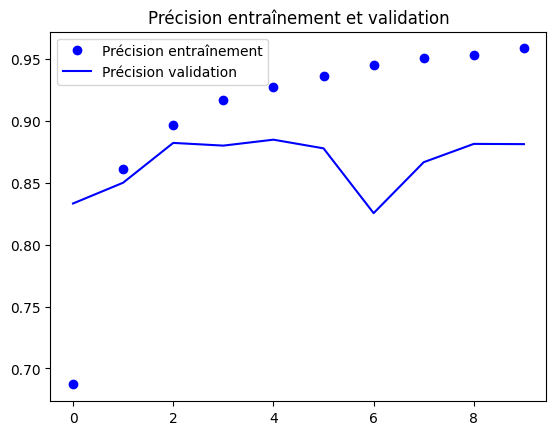

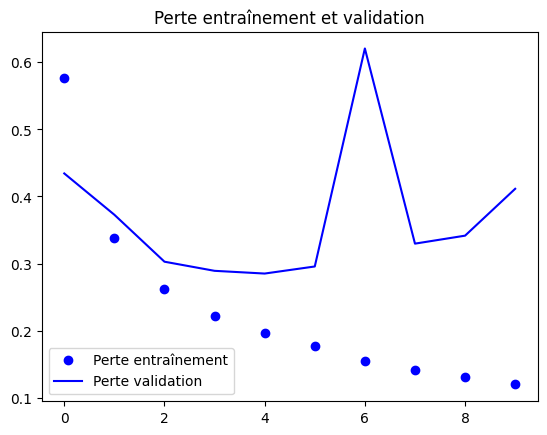

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Graphique de la précision d'entraînement et de validation
plt.plot(epochs, acc, 'bo', label='Précision entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision validation')
plt.title('Précision entraînement et validation')
plt.legend()

plt.figure()

# Graphique de la perte d'entraînement et de validation
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title('Perte entraînement et validation')
plt.legend()

plt.show()


# Introduction aux Gated Recurrent Units (GRU)

Les GRU (Gated Recurrent Units) sont une variante des Réseaux de Neurones Récurrents (RNN) conçue pour résoudre certains des problèmes rencontrés avec les RNN simples, tout en étant plus simples que les LSTM (Long Short-Term Memory). Les GRU ont des portes similaires aux LSTM, mais avec une architecture plus simplifiée.

## Architecture d'un GRU

Un GRU est composé de deux portes principales :
- **Porte de mise à jour (update gate)** : contrôle combien de l'état précédent doit être conservé et combien du nouvel état doit être ajouté.
- **Porte de réinitialisation (reset gate)** : contrôle combien de l'état précédent doit être oublié.

![Architecture d'un GRU](https://upload.wikimedia.org/wikipedia/commons/3/37/GRU.png)
*Source: [Wikipedia](https://en.wikipedia.org/wiki/Gated_recurrent_unit)*

## Fonctionnement d'un GRU

1. **Initialisation** : Au temps t=0, l'état caché est initialisé (souvent à zéro).
2. **Propagation** : À chaque instant t, les portes de mise à jour et de réinitialisation déterminent comment l'état caché est mis à jour.



## Applications des GRU

Les GRU sont utilisés pour diverses tâches séquentielles, notamment :
- La génération de texte
- La traduction automatique
- La reconnaissance vocale
- La prévision de séries temporelles

## Avantages et Limitations

### Avantages
- **Mémoire à long terme** : Les GRU peuvent capturer des dépendances à long terme dans les séquences.
- **Simplifié par rapport aux LSTM** : Les GRU ont moins de paramètres que les LSTM, ce qui les rend plus rapides à entraîner et à exécuter.

### Limitations
- **Performances similaires aux LSTM** : Dans certains cas, les LSTM peuvent offrir de meilleures performances grâce à leur architecture plus complexe, mais les GRU sont souvent plus efficaces.


In [ ]:
from keras.layers import GRU, Embedding, Dense
from keras.models import Sequential

# Initialisation du modèle séquentiel
model = Sequential()

# Ajout d'une couche d'embedding pour transformer les indices de mots en vecteurs de dimension 32
model.add(Embedding(max_features, 32))

# Ajout d'une couche GRU avec 32 unités
model.add(GRU(32))

# Ajout d'une couche dense avec une unité et une activation sigmoid pour la classification binaire
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec l'optimiseur rmsprop, la perte binaire_crossentropy et la métrique de précision
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


In [ ]:

# Entraînement du modèle sur les données d'entraînement avec 10 époques, une taille de batch de 128
# et une validation croisée de 20% des données d'entraînement
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 14s 77ms/step - loss: 0.6350 - acc: 0.6192 - val_loss: 0.4449 - val_acc: 0.7926
Epoch 2/10
157/157 [==============================] - 9s 55ms/step - loss: 0.3734 - acc: 0.8380 - val_loss: 0.3244 - val_acc: 0.8624
Epoch 3/10
157/157 [==============================] - 7s 47ms/step - loss: 0.2869 - acc: 0.8838 - val_loss: 0.3946 - val_acc: 0.8392
Epoch 4/10
157/157 [==============================] - 7s 42ms/step - loss: 0.2429 - acc: 0.9053 - val_loss: 0.3090 - val_acc: 0.8744
Epoch 5/10
157/157 [==============================] - 6s 36ms/step - loss: 0.2144 - acc: 0.9191 - val_loss: 0.3234 - val_acc: 0.8628
Epoch 6/10
157/157 [==============================] - 5s 33ms/step - loss: 0.1962 - acc: 0.9260 - val_loss: 0.6500 - val_acc: 0.7864
Epoch 7/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1774 - acc: 0.9344 - val_loss: 0.3378 - val_acc: 0.8614
Epoch 8/10
157/157 [==============================] - 4s 27ms/step -

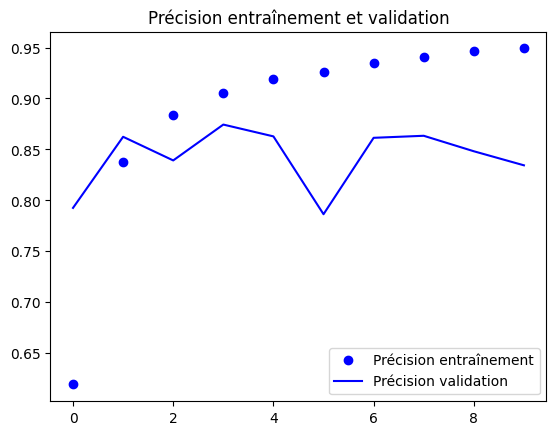

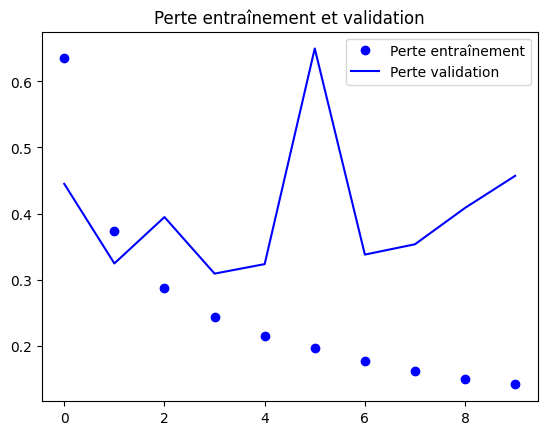

In [ ]:

# Affichage des résultats d'entraînement et de validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Graphique de la précision d'entraînement et de validation
plt.plot(epochs, acc, 'bo', label='Précision entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision validation')
plt.title('Précision entraînement et validation')
plt.legend()

plt.figure()

# Graphique de la perte d'entraînement et de validation
plt.plot(epochs, loss, 'bo', label='Perte entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte validation')
plt.title('Perte entraînement et validation')
plt.legend()

plt.show()
